In [100]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [101]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

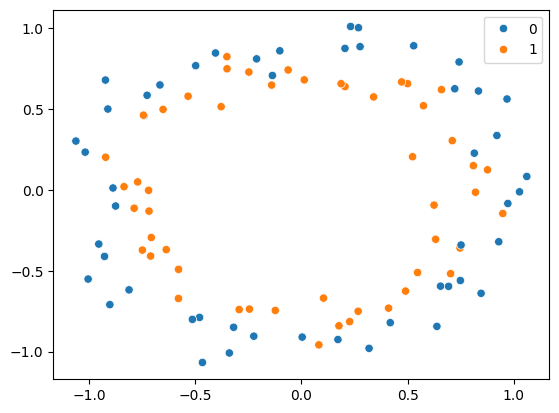

In [102]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)


In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [111]:
mew=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2500, callbacks=callback)

Epoch 1/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5719 - loss: 0.6768 - val_accuracy: 0.4000 - val_loss: 0.7268
Epoch 2/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5352 - loss: 0.6827 - val_accuracy: 0.3500 - val_loss: 0.7242
Epoch 3/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5406 - loss: 0.6801 - val_accuracy: 0.4000 - val_loss: 0.7248
Epoch 4/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5641 - loss: 0.6731 - val_accuracy: 0.4000 - val_loss: 0.7258
Epoch 5/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5445 - loss: 0.6765 - val_accuracy: 0.4000 - val_loss: 0.7258
Epoch 6/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5875 - loss: 0.6702 - val_accuracy: 0.4000 - val_loss: 0.7259
Epoch 7/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5250 - loss: 0.6757 - val_accuracy: 0.4000 - val_loss: 0.7256
Epoch 8/2500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5562 - loss: 0.6727 - val_accuracy: 0.4000 - 

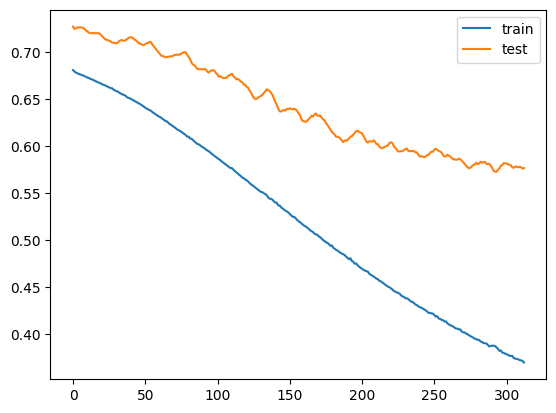

In [112]:
plt.plot(mew.history['loss'],label='train')
plt.plot(mew.history['val_loss'],label='test')
plt.legend()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


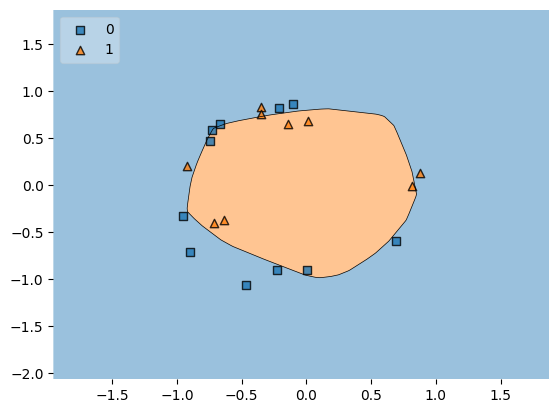

In [113]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()